In [2]:
! pip install keras

    100% |████████████████████████████████| 378kB 14.7MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [125]:
#Dependencies
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [133]:
reg = regularizers.l2(0.01)

In [134]:
# Neural network
model = Sequential()
model.add(Dense(220, activation='softmax', use_bias = True, bias_initializer='normal', bias_regularizer=reg))
model.add(Dropout(0.2))
model.add(Dense(110, activation='relu', use_bias = True, bias_initializer='normal', bias_regularizer=reg))
model.add(Dropout(0.2))
model.add(Dense(80, activation = 'softmax', use_bias = True, bias_initializer='normal', bias_regularizer=reg))

<h2>Load Data</h2>

In [3]:
import io
import pickle
import boto3

s3_client = boto3.client('s3')

In [4]:
# download without using disk
my_array_data2 = io.BytesIO()
s3_client.download_fileobj('bme-bucket', 'engineered_data/Y_minmaxscaled.pkl', my_array_data2)
my_array_data2.seek(0)
Y = pickle.load(my_array_data2)

my_array_data2 = io.BytesIO()
s3_client.download_fileobj('bme-bucket', 'engineered_data/X.pkl', my_array_data2)
my_array_data2.seek(0)
X = pickle.load(my_array_data2)

In [5]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

<h2>Train Model</h2>

In [135]:
model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=20, batch_size=32)

Train on 63919 samples, validate on 15980 samples
Epoch 1/20
63919/63919 [==============================] - 6s 95us/step - loss: 0.1459 - accuracy: 0.1922 - val_loss: 0.1450 - val_accuracy: 0.1803
Epoch 2/20
63919/63919 [==============================] - 5s 80us/step - loss: 0.1443 - accuracy: 0.1878 - val_loss: 0.1448 - val_accuracy: 0.1926
Epoch 3/20
63919/63919 [==============================] - 5s 79us/step - loss: 0.1437 - accuracy: 0.1736 - val_loss: 0.1438 - val_accuracy: 0.1727
Epoch 4/20
63919/63919 [==============================] - 5s 79us/step - loss: 0.1431 - accuracy: 0.1620 - val_loss: 0.1436 - val_accuracy: 0.1646
Epoch 5/20
63919/63919 [==============================] - 5s 79us/step - loss: 0.1430 - accuracy: 0.1553 - val_loss: 0.1435 - val_accuracy: 0.1624
Epoch 6/20
63919/63919 [==============================] - 5s 79us/step - loss: 0.1429 - accuracy: 0.1568 - val_loss: 0.1435 - val_accuracy: 0.1264
Epoch 7/20
63919/63919 [==============================] - 5s 79us/st

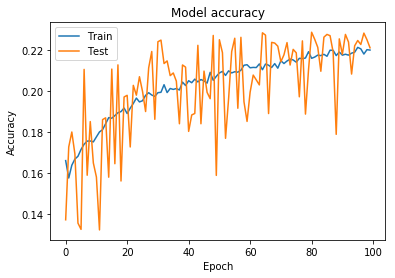

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

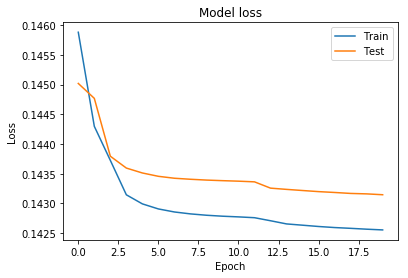

In [136]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

<h2>Save Model</h2>

In [109]:
import boto3

# Convert your existing model to JSON
saved_model = model.to_json()

# Write JSON object to S3 as "keras-model.json"
client = boto3.client('s3')

In [110]:
client.put_object(Body=saved_model,
                  Bucket='bme-bucket',
                  Key='models/keras-model-8.json')

{'ResponseMetadata': {'RequestId': 'BFE2AC49A7F2C1AE',
  'HostId': 'htVLb3Ts8AwrM5iGZ+G8akpn586sjnGX8IOomy0pIJdqls8HO334uJC/qAAWbVsQvdTDJd04TbE=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'htVLb3Ts8AwrM5iGZ+G8akpn586sjnGX8IOomy0pIJdqls8HO334uJC/qAAWbVsQvdTDJd04TbE=',
   'x-amz-request-id': 'BFE2AC49A7F2C1AE',
   'date': 'Sun, 29 Dec 2019 01:43:23 GMT',
   'etag': '"5ea0fa74db07e5b96396412f5cb64961"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"5ea0fa74db07e5b96396412f5cb64961"'}